In [306]:
# Author: Mershab
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
from scipy.interpolate import interp1d

tweets = pd.read_csv('db.csv')

places = pd.read_csv('places.csv')
#places
tweets

,time,fav_count,id,lang,possibly_sensitive,source,text,user.id,user.name,user.handle,user.location,dilbert_label,dilbert_score,label,score
0,Tue Nov 29 15:31:21 +0000 2022,0.0,1.600000e+18,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I take 0 action without strategy,2.904332e+09,Massoud,mxssoud,"Ottawa, Ontario",NEGATIVE,0.995961,1.0,0.924041
1,Tue Nov 29 15:31:20 +0000 2022,0.0,1.600000e+18,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GuidoDisalle gm Guido!,1.370000e+18,aaronrferguson.eth (he/him) 🇺🇦 | Слава Україні!,aaronrferguson,"Ottawa, ON Canada",NEGATIVE,0.947551,5.0,0.498549
2,Tue Nov 29 15:31:18 +0000 2022,0.0,1.600000e+18,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@SleuthieGoosie Absolutely agree with you. Not...,2.993299e+08,Middy T,middyt,"Ottawa, Ontario, Canada",POSITIVE,0.984934,1.0,0.283423
3,Tue Nov 29 15:31:16 +0000 2022,0.0,1.600000e+18,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...","@ThisIsKyleR @elonmusk Yes, life must be soooo...",2.798719e+07,GeeGee23,GeeGee23,Ottawa,NEGATIVE,0.997436,1.0,0.315153
4,Tue Nov 29 15:31:13 +0000 2022,0.0,1.600000e+18,en,False,"<a href=""http://twitter.com/download/android"" ...",@funstonpaleo So looking forward to seeing the...,7.250000e+17,Michelle Campbell Mekarski PhD,MichelleCbell,"Ottawa, Ontario",POSITIVE,0.996623,5.0,0.428462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,Wed Dec 07 05:04:38 +0000 2022,NaN,NaN,en,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@pravda_eng I guess Ukraine shouldn't have sur...,NaN,NaN,NaN,NaN,NEGATIVE,0.991117,1.0,0.605263
4002,Wed Dec 07 05:04:28 +0000 2022,NaN,NaN,fr,NaN,"<a href=""http://twitter.com/download/iphone"" r...",J’ai pas de billets pour Tiakola😡😡😭😭😭😭💔💔💔,NaN,NaN,NaN,NaN,POSITIVE,0.804722,1.0,0.283059
4003,Wed Dec 07 05:04:21 +0000 2022,NaN,NaN,en,NaN,"<a href=""http://twitter.com/download/android"" ...","@hollyanndoan So, Blacklocks was evicted, or w...",NaN,NaN,NaN,NaN,NEGATIVE,0.999364,1.0,0.400155
4004,Wed Dec 07 05:04:20 +0000 2022,NaN,NaN,en,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@shawnmicallef Looking forward to doing it Thu...,NaN,NaN,NaN,NaN,POSITIVE,0.997789,4.0,0.372316


In [307]:
def create_polygon(row : pd.Series):
    name = row['name']
    bbox = json.loads(row['bounding_box'])
    polygon = Polygon(bbox)
    row['polygon'] = polygon
    return row
polygon_df = places.apply(lambda row: create_polygon(row=row), axis='columns')
#polygon = Polygon(places['bounding_box'][0]
polygon_df

,Unnamed: 0,name,bounding_box,polygon
0,0,Ottawa,"[[-76.353876, 44.961937], [-76.353876, 45.5356...","POLYGON ((-76.353876 44.961937, -76.353876 45...."
1,0,Ottawa,"[[-76.353876, 44.961937], [-76.353876, 45.5356...","POLYGON ((-76.353876 44.961937, -76.353876 45...."
2,0,Ontario,"[[-95.155898, 41.676329], [-95.155898, 56.8523...","POLYGON ((-95.155898 41.676329, -95.155898 56...."
3,0,Canada,"[[-141.5610942, 41.676329], [-141.5610942, 89....","POLYGON ((-141.5610942 41.676329, -141.5610942..."
4,0,Gatineau,"[[-75.908759, 45.366368], [-75.908759, 45.5991...","POLYGON ((-75.908759 45.366368, -75.908759 45...."
5,0,Gatineau,"[[-75.908759, 45.366368], [-75.908759, 45.5991...","POLYGON ((-75.908759 45.366368, -75.908759 45...."
6,0,Cantley,"[[-75.8969742, 45.507139], [-75.8969742, 45.63...","POLYGON ((-75.8969742 45.507139, -75.8969742 4..."
7,0,Chelsea,"[[-75.929366, 45.458453], [-75.929366, 45.6159...","POLYGON ((-75.929366 45.458453, -75.929366 45...."
8,0,Russell,"[[-75.425884, 45.18207], [-75.425884, 45.35618...","POLYGON ((-75.425884 45.18207, -75.425884 45.3..."
9,0,Clarence-Rockland,"[[-75.3413168, 45.364498], [-75.3413168, 45.58...","POLYGON ((-75.3413168 45.364498, -75.3413168 4..."


/home/mershab/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Index(['Unnamed: 0', 'name', 'bounding_box', 'polygon', 'geometry'], dtype='object')

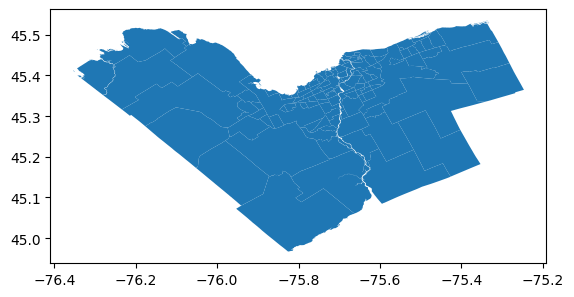

In [308]:
crs = {'init':'EPSG:4326'}
gto = gpd.read_file('ottawa.shp')
gto.plot()
geo_df = gpd.GeoDataFrame(polygon_df, crs=crs, geometry=polygon_df['polygon'])
geo_df.columns

In [309]:
def fit_tweet_loc(place_name):
    tweet_count = 0
    for index, value in tweets['user.location'].items():
        if type(value) is not str:
            continue
        cleaned_val = value.split(',')[0]
        if cleaned_val == place_name:
            tweet_count = tweet_count + 1

    return tweet_count

geo_df['tweet_count'] = geo_df['name'].dropna().apply(lambda place_name: fit_tweet_loc(place_name))
cleaned_geo_df = geo_df[(geo_df['name'] != 'Canada')]
cleaned_geo_df = cleaned_geo_df[(geo_df['name'] != 'Ontario')]

def fit_dilbert_loc(place_name):

    place_dilbert_list = []
    for index, value in tweets['user.location'].items():
        if type(value) is not str:
            continue
        cleaned_val = value.split(',')[0]
        if cleaned_val == place_name:
            #Add the count to our language
            dilbert = tweets.loc[index, 'dilbert_score']
            if dilbert is None:
                continue
            place_dilbert_list.append(dilbert)

    if place_dilbert_list is None:
        return 0
    else:
        mean =  np.nanmean(place_dilbert_list)
        return mean

def fit_bert_loc(place_name):

    place_dilbert_list = []
    for index, value in tweets['user.location'].items():
        if type(value) is not str:
            continue
        cleaned_val = value.split(',')[0]
        if cleaned_val == place_name:
            #Add the count to our language
            bert = tweets.loc[index, 'label']
            if bert is None:
                continue
            place_dilbert_list.append(bert)

    if place_dilbert_list is None:
        return 0
    else:
        mean =  np.nanmean(place_dilbert_list)
        return mean
cleaned_geo_df['bert_avg'] = cleaned_geo_df['name'].dropna().apply(lambda place_name: fit_bert_loc(place_name))
cleaned_geo_df['dilbert_avg'] = cleaned_geo_df['name'].dropna().apply(lambda place_name: fit_dilbert_loc(place_name))

cleaned_geo_df

/home/mershab/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1415: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/tmp/ipykernel_37835/539488953.py:53: RuntimeWarning: Mean of empty slice
  mean =  np.nanmean(place_dilbert_list)
/tmp/ipykernel_37835/539488953.py:33: RuntimeWarning: Mean of empty slice
  mean =  np.nanmean(place_dilbert_list)


,Unnamed: 0,name,bounding_box,polygon,geometry,tweet_count,bert_avg,dilbert_avg
0,0,Ottawa,"[[-76.353876, 44.961937], [-76.353876, 45.5356...","POLYGON ((-76.353876 44.961937, -76.353876 45....","POLYGON ((-76.35388 44.96194, -76.35388 45.535...",2230,2.900423,0.955956
1,0,Ottawa,"[[-76.353876, 44.961937], [-76.353876, 45.5356...","POLYGON ((-76.353876 44.961937, -76.353876 45....","POLYGON ((-76.35388 44.96194, -76.35388 45.535...",2230,2.900423,0.955956
4,0,Gatineau,"[[-75.908759, 45.366368], [-75.908759, 45.5991...","POLYGON ((-75.908759 45.366368, -75.908759 45....","POLYGON ((-75.90876 45.36637, -75.90876 45.599...",93,3.021978,0.947943
5,0,Gatineau,"[[-75.908759, 45.366368], [-75.908759, 45.5991...","POLYGON ((-75.908759 45.366368, -75.908759 45....","POLYGON ((-75.90876 45.36637, -75.90876 45.599...",93,3.021978,0.947943
6,0,Cantley,"[[-75.8969742, 45.507139], [-75.8969742, 45.63...","POLYGON ((-75.8969742 45.507139, -75.8969742 4...","POLYGON ((-75.89697 45.50714, -75.89697 45.638...",0,NaN,NaN
7,0,Chelsea,"[[-75.929366, 45.458453], [-75.929366, 45.6159...","POLYGON ((-75.929366 45.458453, -75.929366 45....","POLYGON ((-75.92937 45.45845, -75.92937 45.615...",1,1.000000,0.990848
8,0,Russell,"[[-75.425884, 45.18207], [-75.425884, 45.35618...","POLYGON ((-75.425884 45.18207, -75.425884 45.3...","POLYGON ((-75.42588 45.18207, -75.42588 45.356...",0,NaN,NaN
9,0,Clarence-Rockland,"[[-75.3413168, 45.364498], [-75.3413168, 45.58...","POLYGON ((-75.3413168 45.364498, -75.3413168 4...","POLYGON ((-75.34132 45.36450, -75.34132 45.585...",0,NaN,NaN
10,0,La Pêche,"[[-76.325178, 45.599395], [-76.325178, 45.8034...","POLYGON ((-76.325178 45.599395, -76.325178 45....","POLYGON ((-76.32518 45.59940, -76.32518 45.803...",0,NaN,NaN
11,0,North Dundas,"[[-75.59503, 44.956507], [-75.59503, 45.217993...","POLYGON ((-75.59503 44.956507, -75.59503 45.21...","POLYGON ((-75.59503 44.95651, -75.59503 45.217...",0,NaN,NaN


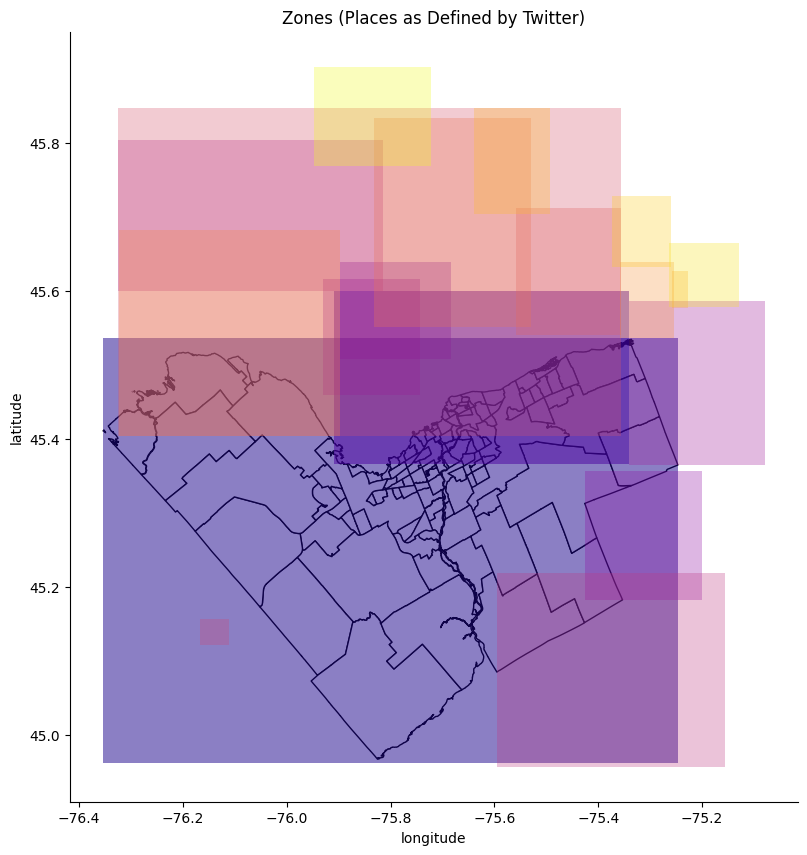

In [310]:

# MAP OF DIFFERENT ZONES
fig, gax = plt.subplots(figsize=(10,10))

gto.plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gax.set_title('Zones (Places as Defined by Twitter)')



cleaned_geo_df.plot(ax=gax, cmap='plasma', label=cleaned_geo_df['name'], alpha = 0.3)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.savefig('zones.png')

plt.show()

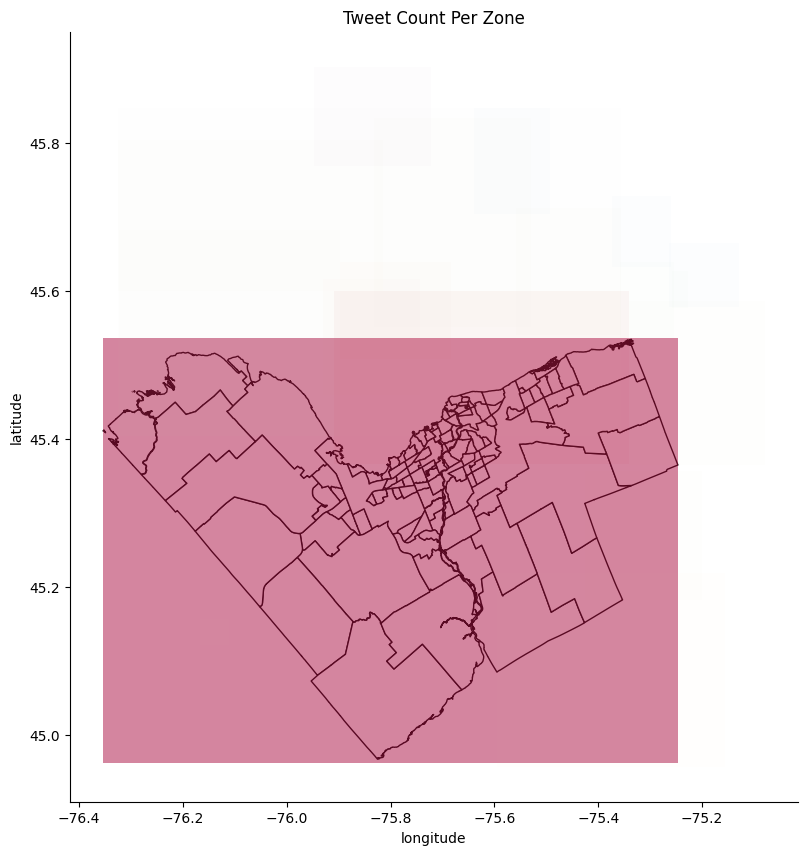

In [311]:

# MAP OF Tweet_Count
fig, gax = plt.subplots(figsize=(10,10))

gto.plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gax.set_title('Tweet Count Per Zone')

#ALPHAS
tw_max = np.max(cleaned_geo_df['tweet_count'])
tw_min = np.min(cleaned_geo_df['tweet_count'])

alphas=[]

reducer = interp1d([tw_min,tw_max],[.01,0.3])

for index, value in cleaned_geo_df['tweet_count'].items():
    alpha = float(reducer(value))
    alphas.append(alpha)

cleaned_geo_df.plot(ax=gax, cmap='Spectral', label=cleaned_geo_df['name'], alpha =alphas)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.savefig('tweet_zones.png')

plt.show()

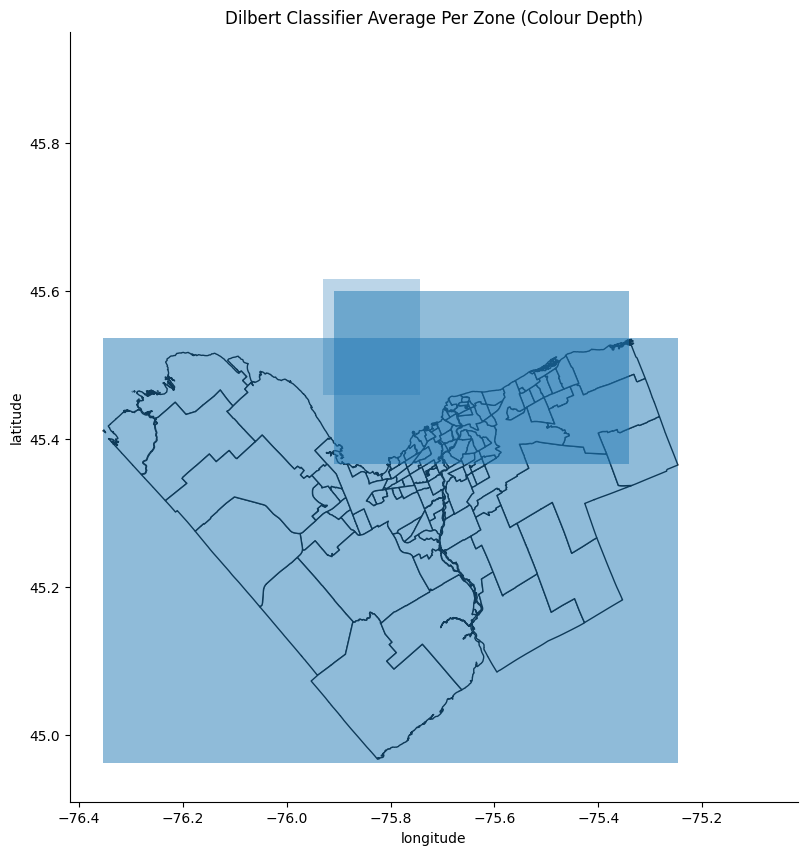

In [312]:

# MAP OF Dilbert 
fig, gax = plt.subplots(figsize=(10,10))

gto.plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gax.set_title('Dilbert Classifier Average Per Zone (Colour Depth)')

#ALPHAS
tw_max = np.nanmax(cleaned_geo_df['dilbert_avg'])
tw_min = 0

alphas=[]

reducer = interp1d([tw_min,tw_max],[.01,0.3])

for index, value in cleaned_geo_df['dilbert_avg'].items():
    alpha = float(reducer(value))
    alphas.append(alpha)

alphas = np.nan_to_num(alphas)

cleaned_geo_df.plot(ax=gax, label=cleaned_geo_df['name'], alpha =alphas)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.savefig('dilbert_zones.png')

plt.show()

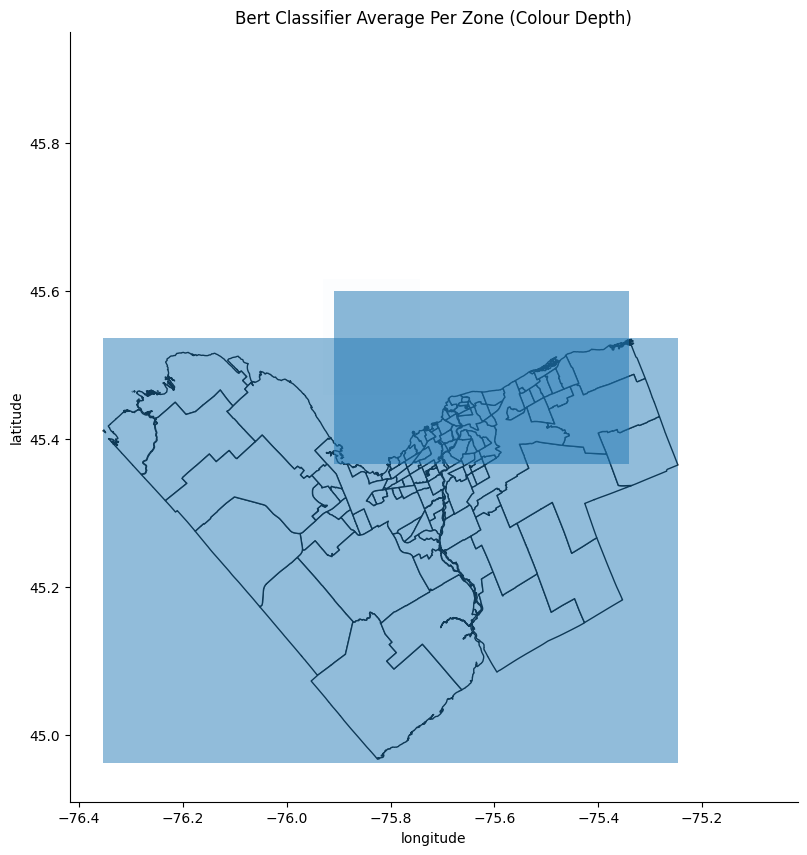

In [313]:

# MAP OF Bert 
fig, gax = plt.subplots(figsize=(10,10))

gto.plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gax.set_title('Bert Classifier Average Per Zone (Colour Depth)')

#ALPHAS
tw_max = np.nanmax(cleaned_geo_df['bert_avg'])
tw_min = np.nanmin(cleaned_geo_df['bert_avg'])

alphas=[]

reducer = interp1d([tw_min,tw_max],[.01,0.3])

for index, value in cleaned_geo_df['bert_avg'].items():
    alpha = float(reducer(value))
    alphas.append(alpha)

alphas = np.nan_to_num(alphas)

cleaned_geo_df.plot(ax=gax, label=cleaned_geo_df['name'], alpha =alphas)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.savefig('bert_zones.png')

plt.show()